In [162]:
import matplotlib.pyplot as plt

In [163]:
# A (x1, y1, z1)
# B (x2, y2, z2)
# C (x3, y3, z3)

def three_points_on_one_line(A, B, C):
    if (C[0] - A[0]) * (B[1] - A[1]) == (B[0] - A[0]) * (C[1] - A[1]) and \
    (C[1] - A[1]) * (B[2] - A[2]) == (B[1] - A[1]) * (C[2] - A[2]):
        return True
    return False

In [164]:
# vector1 = (x1, y1, z1)
# vector2 = (x2, y2, z2)

def vector_product(vector1, vector2):
    return (vector1[1] * vector2[2] - vector2[1] * vector1[2],
            vector1[2] * vector2[0] - vector1[0] * vector2[2],
            vector1[0] * vector2[1] - vector2[0] * vector1[1])

In [165]:
# A (x1, y1, z1)
# B (x2, y2, z2)

def midpoint(A, B):
    return ((A[0] + B[0]) / 2,
            (A[1] + B[1]) / 2,
            (A[2] + B[2]) / 2)

In [166]:
# A (x1, y1, z1)
# vector = (x2, y2, z2)

def point_plus_vector(A, vector):
    return (A[0] + vector[0], A[1] + vector[1], A[2] + vector[2])

In [167]:
# beginning (x1, y1, z1)
# end (x2, y2, z2)

def get_vector(beginning, end):
    return (end[0] - beginning[0], end[1] - beginning[1], end[2] - beginning[2])

In [168]:
# vector = (x, y, z)

def length(vector):
    return (vector[0] ** 2 + vector[1] ** 2 + vector[2] ** 2) ** 0.5

In [169]:
# vector = (x, y, z)

def multiply_by_number(vector, n):
    return (vector[0] * n, vector[1] * n, vector[2] * n)

In [170]:
# sample = (x1, y1, z1)
# changeable_vector = (x2, y2, z2)

def make_same_length(sample, changeable_vector):
    sample_length = length(sample)
    changeable_vector_length = length(changeable_vector)
    return multiply_by_number(changeable_vector, sample_length / changeable_vector_length)

In [171]:
# A (x, y, z)

def from3Dto2D_xOy(A):
    return (A[0], A[1])

In [172]:
def draw(points_2D):
    fig, ax = plt.subplots()
    fig.set_size_inches(20, 10)
    ax.plot(*zip(*(points_2D + points_2D[:1])), marker='o')
    automin, automax = plt.xlim()
    plt.xlim(automin-0.5, automax+0.5)
    automin, automax = plt.ylim()
    plt.ylim(automin-0.5, automax+0.5)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    plt.show()

In [173]:
def cube_solution(A, B, C):
    if three_points_on_one_line(A, B, C):
        print("Three points lie on the same straight line!")
        return;
    vector1 = get_vector(A, B)
    vector2 = get_vector(A, C)
    perpendicular = vector_product(vector1, vector_product(vector2, vector1))
    perpendicular = make_same_length(vector1, perpendicular)
    X = point_plus_vector(A, perpendicular)
    Y = point_plus_vector(X, vector1)
    
    perpendicular = vector_product(vector1, perpendicular)
    perpendicular = make_same_length(vector1, perpendicular)
    AA = point_plus_vector(A, perpendicular)
    BB = point_plus_vector(B, perpendicular)
    XX = point_plus_vector(X, perpendicular)
    YY = point_plus_vector(Y, perpendicular)
    
    points_for_drawing = [from3Dto2D_xOy(point) for point in [A, B, X, Y, AA, BB, XX, YY]]
    draw(points_for_drawing)
    return points_for_drawing

In [174]:
def pyramid_solution(A, B, C):
    if three_points_on_one_line(A, B, C):
        print("Three points lie on the same straight line!")
        return;
    vector1 = get_vector(A, B)
    vector2 = get_vector(A, C)
    perpendicular = vector_product(vector1, vector_product(vector2, vector1))
    perpendicular = make_same_length(vector1, perpendicular)
    X = point_plus_vector(A, perpendicular)
    Y = point_plus_vector(X, vector1)
    
    centre = midpoint(B, X)
    perpendicular = vector_product(vector1, perpendicular)
    perpendicular = make_same_length(vector1, perpendicular)
    perpendicular = multiply_by_number(perpendicular, 1 / (2 ** 0.5))
    O = point_plus_vector(centre, perpendicular)
    
    points_for_drawing = [from3Dto2D_xOy(point) for point in [A, B, X, Y, O]]
    draw(points_for_drawing)
    return points_for_drawing

In [175]:
def tetrahedron_solution(A, B, C):
    if three_points_on_one_line(A, B, C):
        print("Three points lie on the same straight line!")
        return;
    vector1 = get_vector(A, B)
    vector2 = get_vector(A, C)
    centreAB = midpoint(A, B)
    perpendicular = vector_product(vector1, vector_product(vector2, vector1))
    perpendicular = make_same_length(vector1, perpendicular)
    perpendicular = multiply_by_number(perpendicular, (3 ** 0.5) / 2)
    X = point_plus_vector(centreAB, perpendicular)
    
    centre = point_plus_vector(centreAB, multiply_by_number(perpendicular, 1 / 3))
    vectorAX = get_vector(A, X)
    perpendicular = vector_product(vector1, vectorAX)
    perpendicular = make_same_length(vector1, perpendicular)
    perpendicular = multiply_by_number(perpendicular, (2 / 3) ** 0.5)
    O = point_plus_vector(centre, perpendicular)
    
    points_for_drawing = [from3Dto2D_xOy(point) for point in [A, B, X, O]]
    draw(points_for_drawing)
    return points_for_drawing

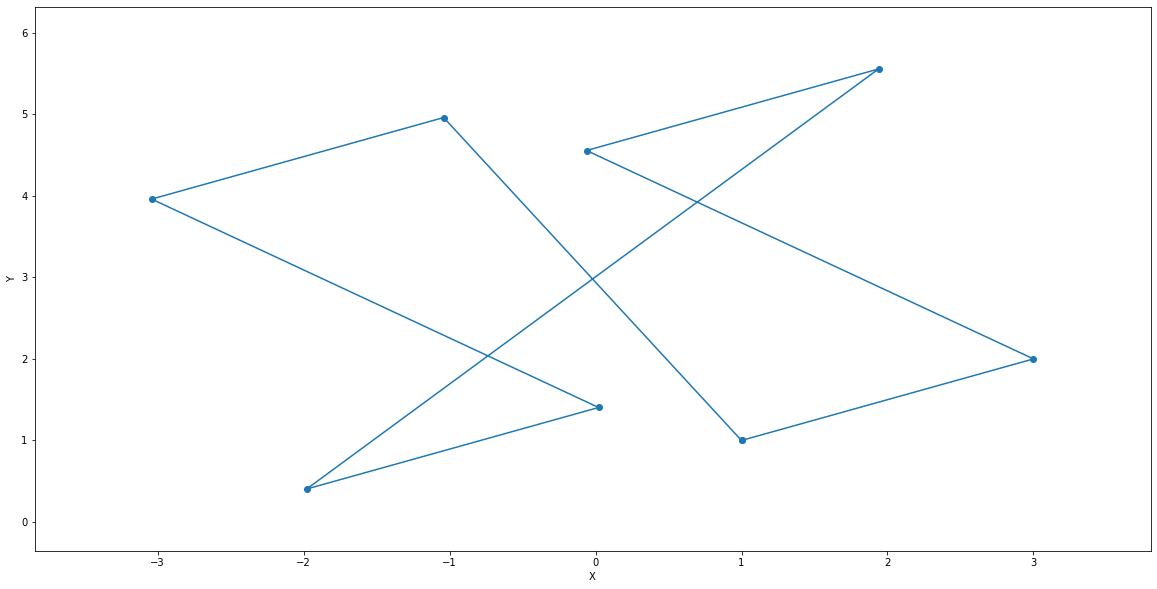

[(1, 1),
 (3, 2),
 (-0.0614897848685505, 4.555990779309644),
 (1.9385102151314495, 5.555990779309644),
 (-1.9787983209038704, 0.4042403358192258),
 (0.021201679096129578, 1.404240335819226),
 (-3.040288105772421, 3.96023111512887),
 (-1.040288105772421, 4.960231115128869)]

In [176]:
cube_solution((1, 1, 1), (3, 2, 4), (0, 6, 1))

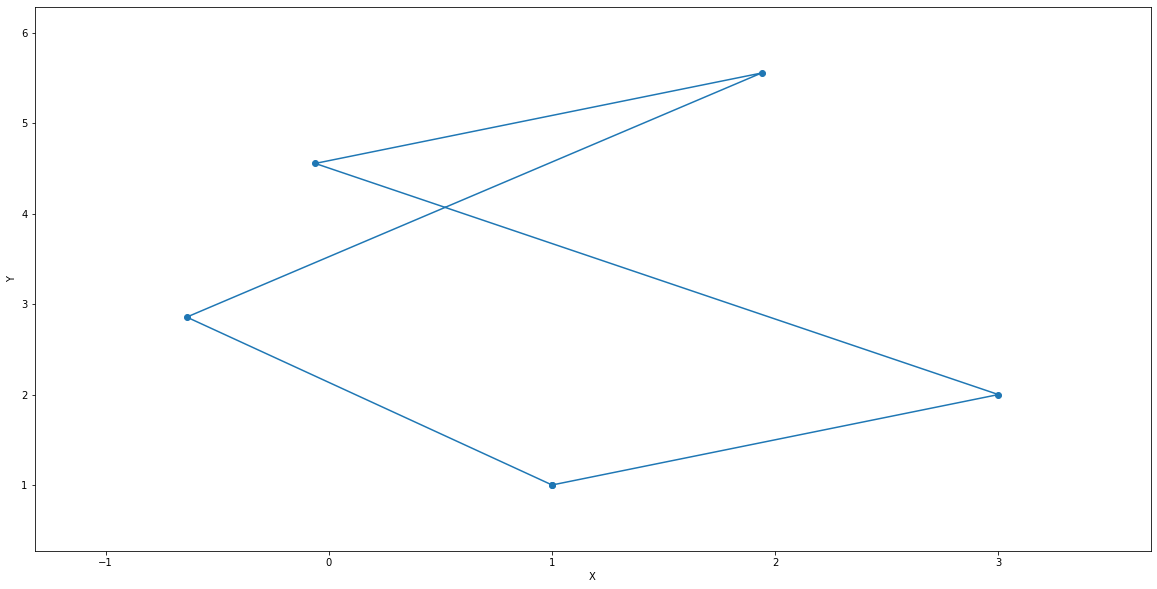

[(1, 1),
 (3, 2),
 (-0.0614897848685505, 4.555990779309644),
 (1.9385102151314495, 5.555990779309644),
 (-0.6370733849325032, 2.8567296911551763)]

In [177]:
pyramid_solution((1, 1, 1), (3, 2, 4), (0, 6, 1))

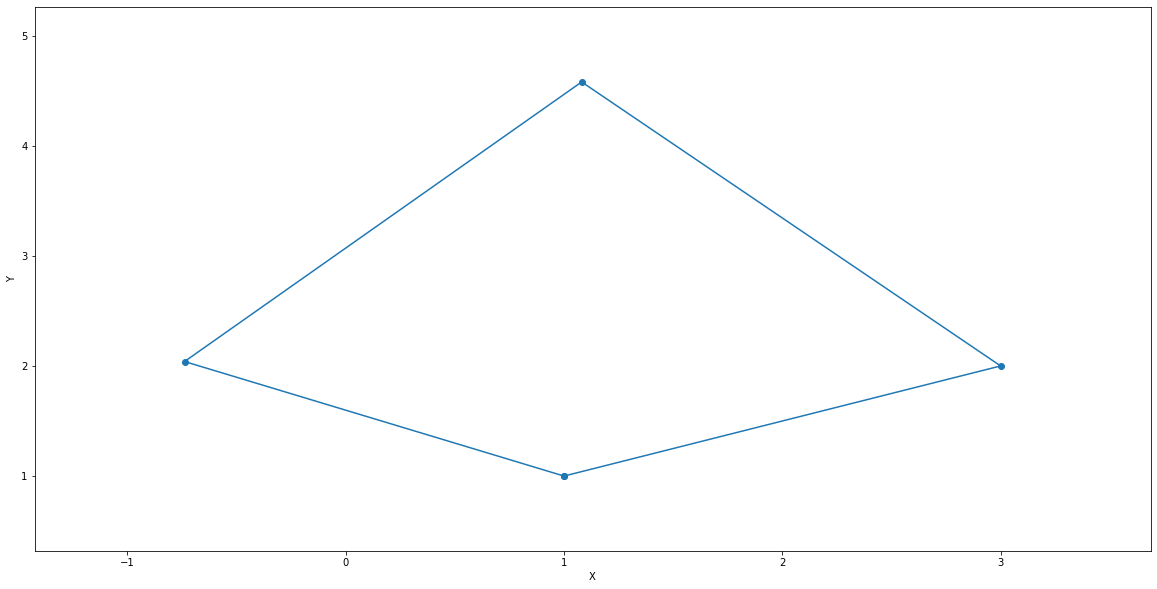

[(1, 1),
 (3, 2),
 (1.0807228804461566, 4.579578350505375),
 (-0.7386043508092093, 2.040090387976872)]

In [178]:
tetrahedron_solution((1, 1, 1), (3, 2, 4), (0, 6, 1))

In [179]:
cube_solution((1, 1, 1), (3, 3, 3), (10, 10, 10))

Three points lie on the same straight line!
